In [1]:
import os
os.environ['DATA_READER_VENDOR'] = 'tiingo'

%pylab inline
from requests import post
from app.analysis import Quote
def screen_securities(after=None):
    query = 'query screen($limit:[SecurityLimitOptionInput!]!,$after:String){viewer{screenSecurities(filterTypes:EQUITY,limit:$limit,sort:{type:MARKET_CAP,direction:DESC},first:100,after:$after){pageInfo{hasNextPage,endCursor},edges{node{symbol}}}}}'
    variables = {'limit':[{'type':'MARKET_CAP','min':32000000000,'inclusive':True}],'after':after}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    cursor = r['data']['viewer']['screenSecurities']['pageInfo']['endCursor']
    return [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['screenSecurities']['edges']], cursor
s1, after = screen_securities()
s2, after = screen_securities(after)
symbols = s1 + s2 + screen_securities(after)[0]
print(len(symbols))
quote = Quote(symbols, 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
292
from 2019-05-20 to 2019-07-09 - 292


In [2]:
stats = quote.statistics()
stats = stats[(stats['shrp'] > 0.2) & (stats['len'] == stats['len'].max())]
print(len(stats))
stats

190


,len,mean,std,shrp,yield,drawdown
symbol,,,,,,
DE,30,3.095040,2.765242,1.104915,21.225694,1.663937
ILMN,30,3.408964,3.059190,1.101364,25.499850,2.964856
RELX,30,1.113541,1.072690,1.001089,6.910039,1.928485
WMT,30,1.649594,1.677829,0.959520,11.189913,1.198013
DHR,30,1.593708,1.645397,0.944468,9.315816,2.078315
RACE,30,2.547748,2.681827,0.935208,17.026989,1.670674
AON,30,1.608054,1.752461,0.894953,10.093542,1.875775
SYK,30,2.032396,2.239496,0.889805,13.670722,2.457650
BHP,30,1.758092,1.996058,0.860902,8.696483,4.002035


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:2341: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


evicted IBN 0.596 -0.648
evicted HDB 0.684 -0.498
evicted UBER 0.686 -0.342
evicted ASML 0.697 -0.245
evicted AMX 0.661 -0.488
evicted INFY 0.589 -0.458
evicted ANTM 0.675 -0.618
evicted NVS 0.639 -0.616
evicted NOW 0.664 -0.318
evicted LFC 0.506 -0.304
evicted DG 0.586 -0.536
evicted SO 0.660 -0.395
evicted ABEV 0.668 -0.503
evicted DE 0.389 -0.326
evicted LYB 0.588 -0.518
evicted MU 0.601 -0.516
evicted AMD 0.423 -0.307
retry backlogs ['ATVI', 'BABA', 'BKNG', 'BLK', 'AAPL', 'ING', 'SNY', 'AABA', 'NVDA', 'MRK', 'TD', 'ORAN', 'TEF', 'VOD', 'SNE', 'MAR', 'USB', 'BCE', 'LVS', 'GE', 'TGT', 'COST', 'TRP', 'ILMN', 'CHA', 'MDT', 'VRTX', 'TXN', 'AMGN', 'BAM', 'ROST', 'GM', 'NKE', 'TEAM', 'AXP', 'MSFT', 'CAT', 'WM', 'NFLX', 'VFC', 'BAX', 'SLB', 'WBA', 'CI', 'ETN', 'CP', 'DAL', 'TSM', 'TMO', 'EW', 'PBR-A', 'PNC', 'AFL', 'AMT', 'ITUB', 'CTSH', 'BDX', 'AMAT', 'HMC', 'AON', 'PFE', 'BRK-B', 'SAN', 'BSBR', 'JD', 'BUD', 'ZTS', 'ADBE', 'IBM', 'ORCL', 'SAP', 'YUM', 'V', 'CHTR', 'UPS', 'NOC', 'T', 'ICE'

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,30.0,1.835845,0.482122,0.915798,1.636997,1.827162,2.148644,2.696323,3.725532,13.300695,0.691650
WMT,30.0,1.649594,1.677829,-0.691536,0.553248,1.560630,2.199947,5.453119,0.959520,11.189913,1.198013
HD,30.0,1.839164,2.250783,-2.076554,-0.430066,2.129755,4.156903,5.195655,0.799491,11.791495,3.081657
BBD,30.0,3.035881,3.828939,-4.175365,0.632298,3.499130,5.566251,11.071849,0.782514,26.063729,4.375000
MCD,30.0,1.124999,1.391165,-1.911529,0.098277,1.132934,2.149984,4.038132,0.780150,7.206822,2.034261
TGT,30.0,2.454835,3.709253,-2.379334,-0.449824,1.627696,3.546627,12.056049,0.651116,21.809101,3.069083
DIS,30.0,1.131139,1.919248,-1.915223,-0.407804,1.100734,2.881093,4.544078,0.568690,6.403413,2.144306
AGN,30.0,4.036626,13.138776,-12.250018,-4.194961,0.836224,7.291079,34.640252,0.304210,19.938031,17.045373
FB,30.0,1.333759,4.899164,-9.339445,-0.938827,1.664711,5.328435,8.116920,0.264142,9.024737,11.423484
RIO,30.0,0.621632,2.695190,-3.504301,-1.594090,0.078777,3.015775,6.173478,0.215922,1.406093,5.774361


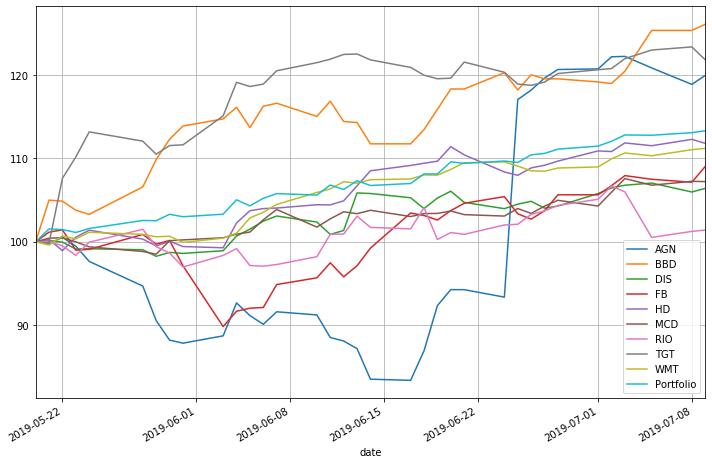

In [3]:
quote.setup_mask(stats.index)
ratio, shrp = quote.optimize_portfolio(.02, backlogs_threshold=.7)
print(ratio, shrp)
quote.setup_mask(ratio)
quote.graph(ratio)